In [ ]:
# Dense Neural Networks works better on flattened neural inputs & the don't capture the spatial features of the images
# CNN works better on image recognition and processing tasks

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras import layers

In [ ]:
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karmakarabhishek5","key":"36b4a526001d0aea0dbb0308eec30991"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle datasets download -d splcher/animefacedataset

 93% 369M/395M [00:01<00:00, 188MB/s]
100% 395M/395M [00:02<00:00, 203MB/s]


In [ ]:
!unzip animefacedataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/62764_2019.jpg   
  inflating: images/62765_2019.jpg   
  inflating: images/62766_2019.jpg   
  inflating: images/62767_2019.jpg   
  inflating: images/62768_2019.jpg   
  inflating: images/62769_2019.jpg   
  inflating: images/6276_2003.jpg    
  inflating: images/62770_2019.jpg   
  inflating: images/62771_2019.jpg   
  inflating: images/62772_2019.jpg   
  inflating: images/62773_2019.jpg   
  inflating: images/62774_2019.jpg   
  inflating: images/62775_2019.jpg   
  inflating: images/62776_2019.jpg   
  inflating: images/62777_2019.jpg   
  inflating: images/62778_2019.jpg   
  inflating: images/62779_2019.jpg   
  inflating: images/6277_2003.jpg    
  inflating: images/62780_2019.jpg   
  inflating: images/62781_2019.jpg   
  inflating: images/62782_2019.jpg   
  inflating: images/62783_2019.jpg   
  inflating: images/62784_2019.jpg   
  inflating: images/62785_2019.jpg   
  inflating: images/62786_2019.jpg   

In [ ]:
!ls

animefacedataset.zip  images  kaggle.json  sample_data


In [ ]:
"""
# The training data has been loaded into the Gdrive
os.getcwd() # current working directory

from google.colab import drive
drive.mount('/content/drive')

!unzip 'content' -d'/content'

!ls /content

"""

"\n# The training data has been loaded into the Gdrive\nos.getcwd() # current working directory\n\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n!unzip 'content' -d'/content'\n\n!ls /content\n\n"

In [ ]:
# batch_size help us to load the dataset in batches when run the training process
batch_size=128
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('images', label_mode=None, image_size=(64,64), batch_size=batch_size)
train_dataset = train_dataset.map(lambda x: (x/127.5)-1)  # all the RGB pixel values would range between -1 to 1

Found 63565 files belonging to 1 classes.


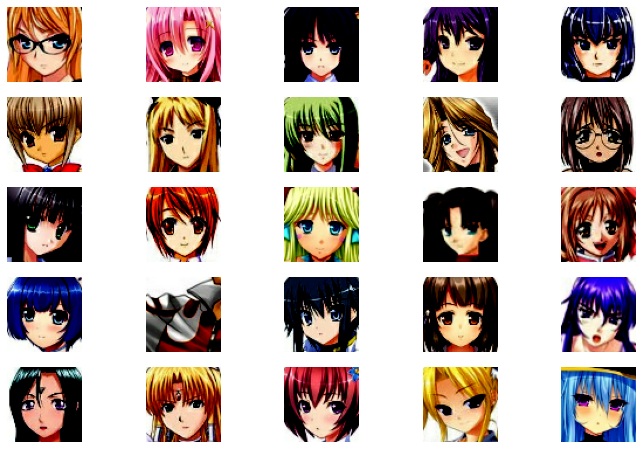

In [ ]:
# extract 1st 25 dataset from out 1st batch
plt.figure(figsize=(12,8))
for images in train_dataset.take(1):
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy())
    plt.axis('off')

Image Shape (64, 64, 3)


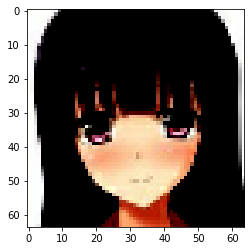

In [ ]:
for batch in train_dataset:
  plt.imshow(batch[0])
  print('Image Shape', batch[0].shape)
  break

In [ ]:
init_weights_kernel = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

In [ ]:
# Generator Model
def generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=(100, )))
  model.add(layers.Dense(4 * 4 * 256))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.Reshape((4,4,256)))  

  model.add(layers.Conv2DTranspose(128, kernel_size=4, padding='same', strides=2, kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Conv2DTranspose(64, kernel_size=4, padding='same', strides=2, kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU()) 
  
  model.add(layers.Conv2DTranspose(32, kernel_size=4, padding='same', strides=2, kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())     

  model.add(layers.Conv2DTranspose(3, kernel_size=4, padding='same', strides=2, activation = 'tanh', kernel_initializer = init_weights_kernel, use_bias=False))

  return model

In [ ]:
generator = generator_model()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              413696    
                                                                 
 batch_normalization_1 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 4096)              0         
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524288    
 nspose)                                                         
                                                                 
 batch_normalization_2 (Batc  (None, 8, 8, 128)       

(1, 64, 64, 3)


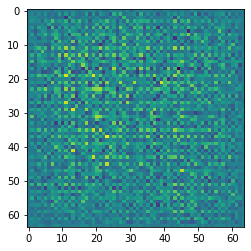

In [ ]:
noise = tf.random.normal([1,100])
generated_image = generator(noise, training=False)
print(generated_image.shape)
plt.imshow(generated_image[0,:,:,0]*255*100) # This image is just the noise

In [ ]:
generated_image[0,:5,:5]

<tf.Tensor: shape=(5, 5, 3), dtype=float32, numpy=
array([[[ 5.85845373e-05,  1.66959671e-05, -2.27251912e-05],
        [ 4.56417183e-07,  1.08305198e-04,  2.47182586e-04],
        [ 2.05613105e-04,  1.83777622e-04, -3.36573517e-04],
        [ 1.72925327e-04,  4.83873009e-06, -3.17629834e-04],
        [-1.02477803e-04,  1.34929811e-04, -3.12428892e-04]],

       [[ 1.11745554e-04,  3.14474200e-05,  7.64692231e-07],
        [ 3.64033214e-04,  3.81991267e-05,  1.52721608e-04],
        [-1.50206557e-04, -3.71170521e-04,  5.41597074e-05],
        [ 4.43441095e-04,  6.09852723e-05, -4.16949159e-04],
        [-1.59711111e-04, -2.60075067e-05, -5.38654967e-05]],

       [[ 1.42190547e-04,  1.95882196e-04, -2.06041688e-04],
        [ 3.60053149e-04,  4.88082791e-04, -2.58831365e-04],
        [ 4.62544325e-04,  3.49972775e-04, -4.95038839e-05],
        [ 1.37359588e-04,  3.76429060e-04, -1.28024374e-04],
        [ 7.95682572e-05,  3.63813364e-04, -4.56831767e-04]],

       [[ 1.32939196e-04, -2

In [ ]:
# DISCRIMINATOR MODEL
def discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(32,kernel_size=3, strides=2, input_shape=(64,64,3), padding='same', kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64,kernel_size=3, strides=2, padding='same', kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(128,kernel_size=3, strides=2, padding='same', kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256,kernel_size=3, strides=1, padding='same', kernel_initializer = init_weights_kernel, use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.3))


  model.add(layers.Flatten())
  model.add(layers.Dense(1, activation='sigmoid'))
  
  return model

In [ ]:
discriminator = discriminator_model()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        864       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18432     
                                                                 
 zero_padding2d (ZeroPadding  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 17, 17, 64)       256       
 hNormalization)                                      

In [ ]:
output = discriminator(generated_image)
print(output)

tf.Tensor([[0.5000008]], shape=(1, 1), dtype=float32)


In [ ]:
bce = tf.keras.losses.BinaryCrossentropy()

In [ ]:
def discriminator_loss(real_output, fake_output):
  real_loss = bce(tf.ones_like(real_output), real_output) 
  fake_loss = bce(tf.zeros_like(fake_output), fake_output) 
  total_loss = real_loss + fake_loss 
  return total_loss

In [ ]:
def generator_loss(fake_output):
  gen_loss = bce(tf.ones_like(fake_output), fake_output)
  return gen_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer, 
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)

In [ ]:
epochs = 40
noise_dim = 100
num_examples_to_generate = 16 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
def generate_and_plot_images(model, epoch , test_input):
  predictions = model(test_input, training = False)

  fig = plt.figure(figsize=(8,4))
  for i in range(predictions.shape[0]):
    plt.subplot(4,4, i+1)
    plt.imshow((predictions[i, :, :, :] * 0.5 + 0.5))
    plt.axis('off')

  plt.savefig('image_at_epch_{:04d}.png'.format(epoch))
  plt.show()

# This will allow us to see how the generator improves over time.

In [ ]:
@tf.function
def train_step(images):
  noise = tf.random.normal([batch_size, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)
    
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)    

  gradient_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradient_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradient_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradient_of_discriminator, discriminator.trainable_variables))

  return (gen_loss, disc_loss, tf.reduce_mean(real_output), tf.reduce_mean(fake_output))


In [ ]:
def train(dataset, epochs):
  
  # list used for plotting
  gen_loss_list = [] 
  disc_loss_list = []

  # list used for accuracies score for the discriminator on real and fake data
  real_score_list = []
  fake_score_list = []

  # run for no. of epochs
  # for every epoch we'll split our real training dataset into batches and feed
  # in this data one batch at a time
  for epoch in tqdm(range(epochs)):
    start = time.time()
    num_batches = len(dataset)

    print(f'Training started with epoch {epoch + 1} with {num_batches} batches...')

    # Variables for total generator loss and the total discriminator loss
    total_gen_loss = 0
    total_disc_loss = 0

    # for every batch of the i/p data, the train_step will train the generator and the discriminator
    # on this batch of data.
    # The train_step function - generates fake images, feeds real as well as fake images to the 
    # discriminator, computes loss, computes gradients for both of our adversary N/W, and updates
    # both the model parameters
    for batch in dataset:
      generator_loss, discriminator_loss, real_score, fake_score = train_step(batch)
      total_gen_loss += generator_loss
      total_disc_loss += discriminator_loss

    # Computer the average loss of the epoch, this mean values will be print out on screen
    mean_gen_loss = total_gen_loss / num_batches
    mean_disc_loss = total_disc_loss / num_batches

    print('Losses after epoch %5d: generator %.3f, discriminator %.3f, real_score %.2f%%, fake_score %.2f%%' %
          (epoch + 1, generator_loss, discriminator_loss, real_score * 100, fake_score * 100))
    
    # generate_and_plot_images function is invokes to feed in our test noise sample, i.e. seed
    # That is our seed and see what is the o/p looks like after the current epoch of training
    generate_and_plot_images(generator, epoch + 1, seed)

    gen_loss_list.append(mean_gen_loss)
    disc_loss_list.append(mean_disc_loss)
    real_score_list.append(real_score)
    fake_score_list.append(fake_score)

    if (epoch + 1) % 10 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  return gen_loss_list, disc_loss_list, real_score_list, fake_score_list

  0%|          | 0/40 [00:00<?, ?it/s]

Training started with epoch 1 with 497 batches...
Losses after epoch     1: generator 2.288, discriminator 0.547, real_score 98.55%, fake_score 27.96%


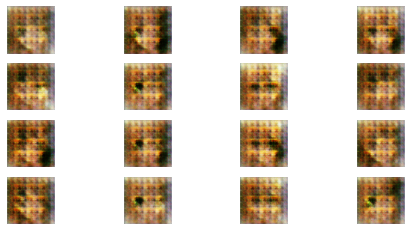

  2%|▎         | 1/40 [00:29<19:07, 29.43s/it]

Time for epoch 1 is 29.426633596420288 sec
Training started with epoch 2 with 497 batches...
Losses after epoch     2: generator 2.837, discriminator 0.297, real_score 96.14%, fake_score 17.58%


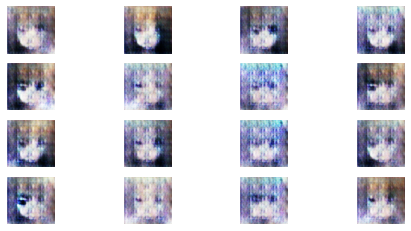

  5%|▌         | 2/40 [00:57<17:57, 28.36s/it]

Time for epoch 2 is 27.613466501235962 sec
Training started with epoch 3 with 497 batches...
Losses after epoch     3: generator 3.891, discriminator 0.795, real_score 78.42%, fake_score 11.61%


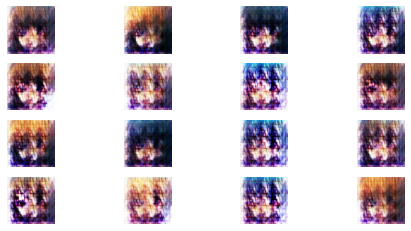

  8%|▊         | 3/40 [01:25<17:28, 28.34s/it]

Time for epoch 3 is 28.30220365524292 sec
Training started with epoch 4 with 497 batches...
Losses after epoch     4: generator 3.708, discriminator 0.306, real_score 86.27%, fake_score 9.19%


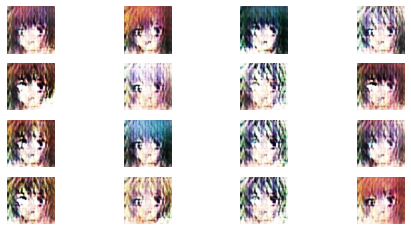

 10%|█         | 4/40 [01:49<16:06, 26.85s/it]

Time for epoch 4 is 24.563626289367676 sec
Training started with epoch 5 with 497 batches...
Losses after epoch     5: generator 4.732, discriminator 0.187, real_score 89.71%, fake_score 3.47%


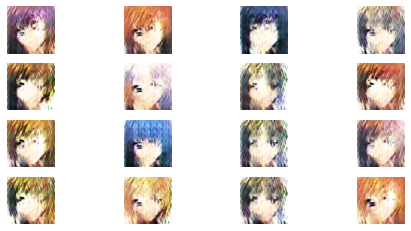

 12%|█▎        | 5/40 [02:14<15:06, 25.90s/it]

Time for epoch 5 is 24.22186827659607 sec
Training started with epoch 6 with 497 batches...
Losses after epoch     6: generator 2.293, discriminator 0.404, real_score 93.10%, fake_score 21.35%


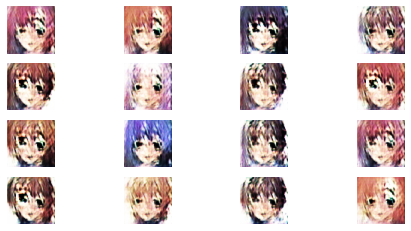

 15%|█▌        | 6/40 [02:38<14:24, 25.41s/it]

Time for epoch 6 is 24.46010661125183 sec
Training started with epoch 7 with 497 batches...
Losses after epoch     7: generator 1.699, discriminator 0.587, real_score 95.28%, fake_score 31.21%


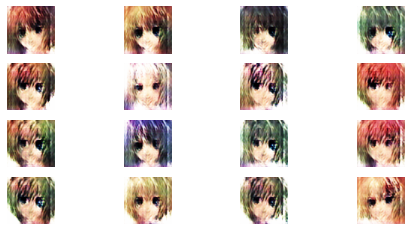

 18%|█▊        | 7/40 [03:03<13:56, 25.35s/it]

Time for epoch 7 is 25.214041471481323 sec
Training started with epoch 8 with 497 batches...
Losses after epoch     8: generator 4.057, discriminator 0.481, real_score 78.67%, fake_score 6.20%


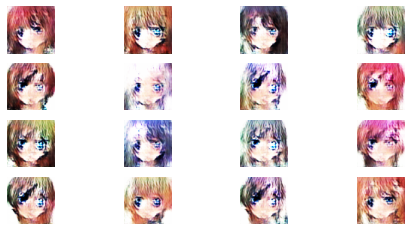

 20%|██        | 8/40 [03:29<13:38, 25.56s/it]

Time for epoch 8 is 26.01358675956726 sec
Training started with epoch 9 with 497 batches...
Losses after epoch     9: generator 3.371, discriminator 0.375, real_score 85.56%, fake_score 11.25%


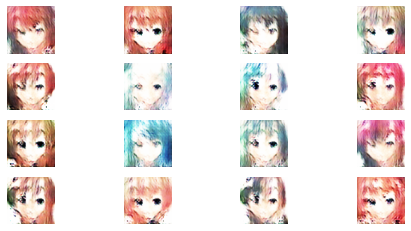

 22%|██▎       | 9/40 [03:55<13:14, 25.62s/it]

Time for epoch 9 is 25.728804111480713 sec
Training started with epoch 10 with 497 batches...
Losses after epoch    10: generator 3.502, discriminator 0.373, real_score 80.01%, fake_score 8.29%


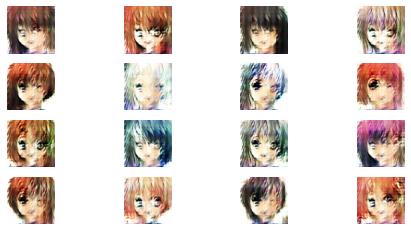

 25%|██▌       | 10/40 [04:20<12:41, 25.39s/it]

Time for epoch 10 is 24.864709615707397 sec
Training started with epoch 11 with 497 batches...
Losses after epoch    11: generator 2.943, discriminator 0.362, real_score 87.17%, fake_score 14.02%


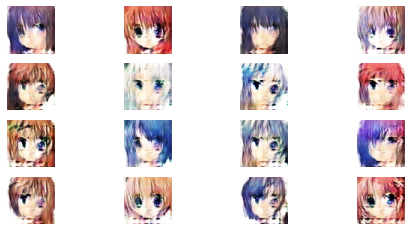

 28%|██▊       | 11/40 [04:45<12:13, 25.30s/it]

Time for epoch 11 is 25.110894441604614 sec
Training started with epoch 12 with 497 batches...
Losses after epoch    12: generator 3.013, discriminator 0.576, real_score 75.66%, fake_score 11.45%


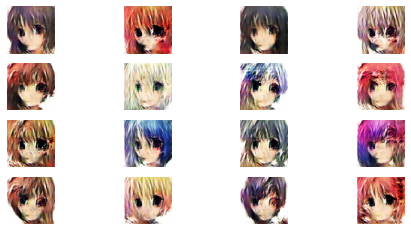

 30%|███       | 12/40 [05:27<14:07, 30.27s/it]

Time for epoch 12 is 41.62185335159302 sec
Training started with epoch 13 with 497 batches...
Losses after epoch    13: generator 3.169, discriminator 0.338, real_score 87.75%, fake_score 11.22%


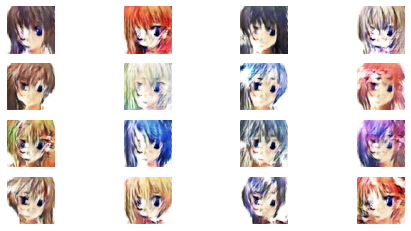

 32%|███▎      | 13/40 [06:08<15:08, 33.64s/it]

Time for epoch 13 is 41.398597717285156 sec
Training started with epoch 14 with 497 batches...
Losses after epoch    14: generator 4.234, discriminator 0.569, real_score 74.92%, fake_score 5.93%


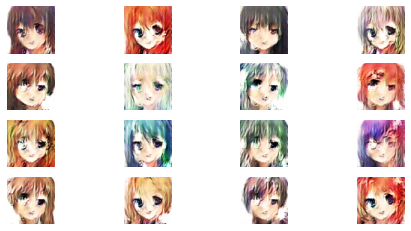

 35%|███▌      | 14/40 [06:33<13:23, 30.90s/it]

Time for epoch 14 is 24.55096745491028 sec
Training started with epoch 15 with 497 batches...
Losses after epoch    15: generator 1.572, discriminator 0.684, real_score 96.38%, fake_score 34.23%


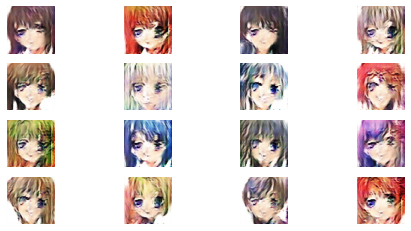

 38%|███▊      | 15/40 [06:57<12:05, 29.00s/it]

Time for epoch 15 is 24.60436201095581 sec
Training started with epoch 16 with 497 batches...
Losses after epoch    16: generator 4.847, discriminator 1.065, real_score 51.57%, fake_score 2.72%


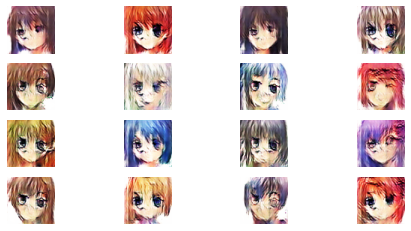

 40%|████      | 16/40 [07:22<11:06, 27.79s/it]

Time for epoch 16 is 24.974024057388306 sec
Training started with epoch 17 with 497 batches...
Losses after epoch    17: generator 2.436, discriminator 0.545, real_score 83.56%, fake_score 20.98%


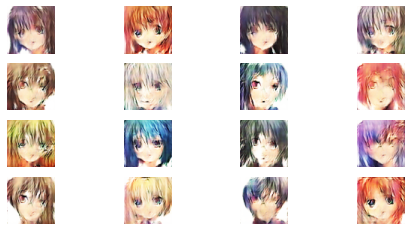

 42%|████▎     | 17/40 [07:49<10:29, 27.38s/it]

Time for epoch 17 is 26.427154064178467 sec
Training started with epoch 18 with 497 batches...
Losses after epoch    18: generator 3.446, discriminator 0.702, real_score 67.91%, fake_score 9.74%


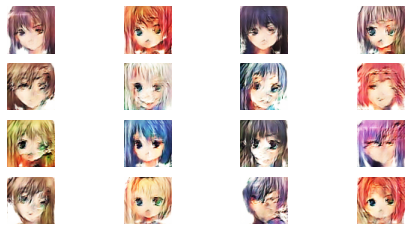

 45%|████▌     | 18/40 [08:13<09:45, 26.61s/it]

Time for epoch 18 is 24.81207013130188 sec
Training started with epoch 19 with 497 batches...
Losses after epoch    19: generator 3.911, discriminator 0.313, real_score 82.49%, fake_score 5.98%


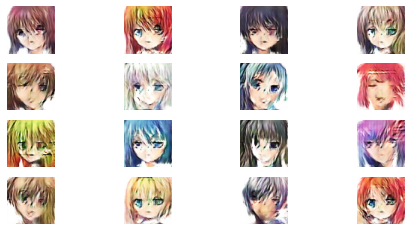

 48%|████▊     | 19/40 [08:38<09:07, 26.09s/it]

Time for epoch 19 is 24.88974165916443 sec
Training started with epoch 20 with 497 batches...
Losses after epoch    20: generator 0.327, discriminator 2.169, real_score 99.28%, fake_score 76.66%


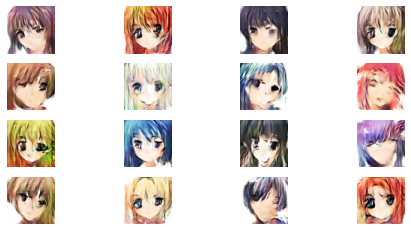

 50%|█████     | 20/40 [09:04<08:36, 25.83s/it]

Time for epoch 20 is 25.218424558639526 sec
Training started with epoch 21 with 497 batches...
Losses after epoch    21: generator 4.122, discriminator 0.613, real_score 65.98%, fake_score 5.23%


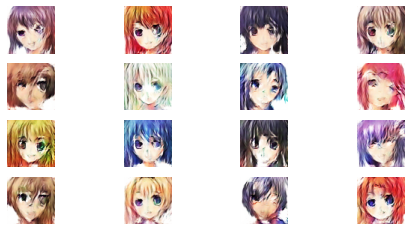

 52%|█████▎    | 21/40 [09:45<09:40, 30.57s/it]

Time for epoch 21 is 41.62401747703552 sec
Training started with epoch 22 with 497 batches...
Losses after epoch    22: generator 4.122, discriminator 0.886, real_score 55.63%, fake_score 4.81%


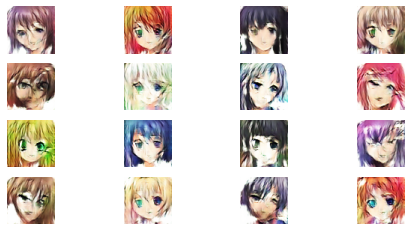

 55%|█████▌    | 22/40 [10:10<08:38, 28.80s/it]

Time for epoch 22 is 24.657710552215576 sec
Training started with epoch 23 with 497 batches...
Losses after epoch    23: generator 3.551, discriminator 0.634, real_score 70.47%, fake_score 10.86%


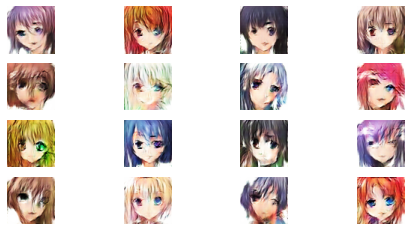

 57%|█████▊    | 23/40 [10:35<07:49, 27.63s/it]

Time for epoch 23 is 24.90415382385254 sec
Training started with epoch 24 with 497 batches...
Losses after epoch    24: generator 1.759, discriminator 0.619, real_score 86.11%, fake_score 28.98%


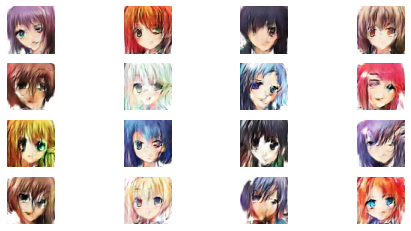

 60%|██████    | 24/40 [11:01<07:16, 27.31s/it]

Time for epoch 24 is 26.55309534072876 sec
Training started with epoch 25 with 497 batches...
Losses after epoch    25: generator 1.125, discriminator 0.910, real_score 89.71%, fake_score 44.61%


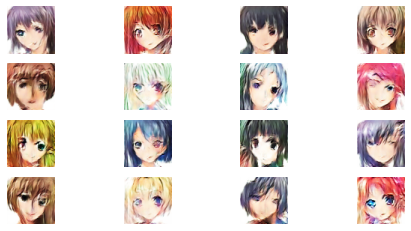

 62%|██████▎   | 25/40 [11:27<06:43, 26.87s/it]

Time for epoch 25 is 25.840858697891235 sec
Training started with epoch 26 with 497 batches...
Losses after epoch    26: generator 2.787, discriminator 0.482, real_score 82.09%, fake_score 15.55%


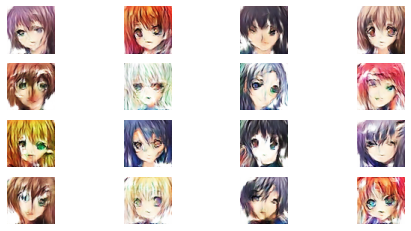

 65%|██████▌   | 26/40 [11:52<06:08, 26.32s/it]

Time for epoch 26 is 25.030078411102295 sec
Training started with epoch 27 with 497 batches...
Losses after epoch    27: generator 4.065, discriminator 0.554, real_score 68.17%, fake_score 4.55%


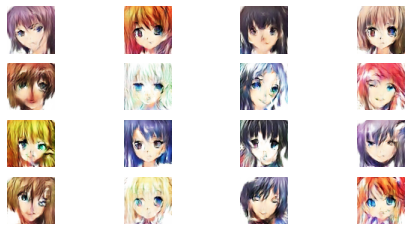

 68%|██████▊   | 27/40 [12:17<05:37, 26.00s/it]

Time for epoch 27 is 25.233856201171875 sec
Training started with epoch 28 with 497 batches...
Losses after epoch    28: generator 1.594, discriminator 0.667, real_score 84.51%, fake_score 30.47%


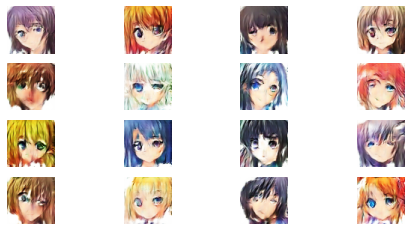

 70%|███████   | 28/40 [12:43<05:10, 25.87s/it]

Time for epoch 28 is 25.552892684936523 sec
Training started with epoch 29 with 497 batches...
Losses after epoch    29: generator 2.404, discriminator 0.409, real_score 89.13%, fake_score 19.06%


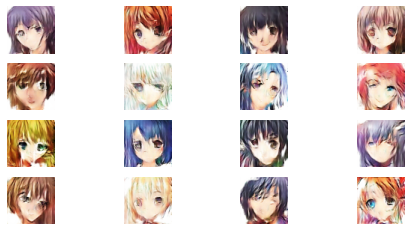

 72%|███████▎  | 29/40 [13:24<05:35, 30.52s/it]

Time for epoch 29 is 41.38362646102905 sec
Training started with epoch 30 with 497 batches...
Losses after epoch    30: generator 1.412, discriminator 0.664, real_score 93.77%, fake_score 36.98%


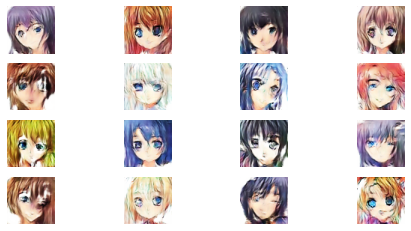

 75%|███████▌  | 30/40 [13:49<04:48, 28.89s/it]

Time for epoch 30 is 25.06258535385132 sec
Training started with epoch 31 with 497 batches...
Losses after epoch    31: generator 2.256, discriminator 0.388, real_score 91.80%, fake_score 20.92%


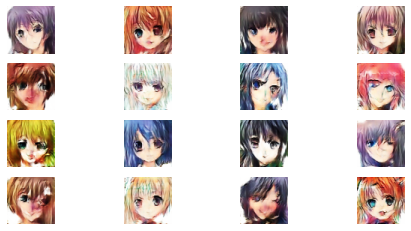

 78%|███████▊  | 31/40 [14:14<04:08, 27.65s/it]

Time for epoch 31 is 24.7643780708313 sec
Training started with epoch 32 with 497 batches...
Losses after epoch    32: generator 4.305, discriminator 0.381, real_score 77.26%, fake_score 4.36%


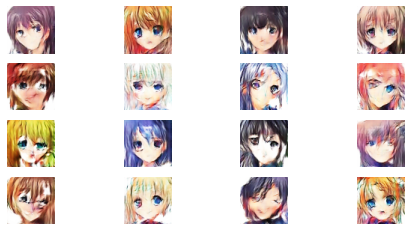

 80%|████████  | 32/40 [14:40<03:36, 27.07s/it]

Time for epoch 32 is 25.730702877044678 sec
Training started with epoch 33 with 497 batches...
Losses after epoch    33: generator 3.522, discriminator 1.203, real_score 48.25%, fake_score 8.05%


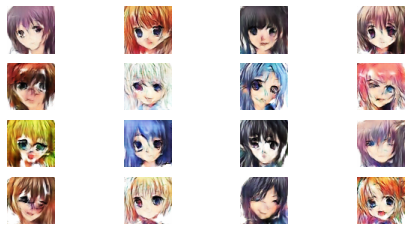

 82%|████████▎ | 33/40 [15:21<03:39, 31.37s/it]

Time for epoch 33 is 41.400378704071045 sec
Training started with epoch 34 with 497 batches...
Losses after epoch    34: generator 3.799, discriminator 0.520, real_score 71.70%, fake_score 6.24%


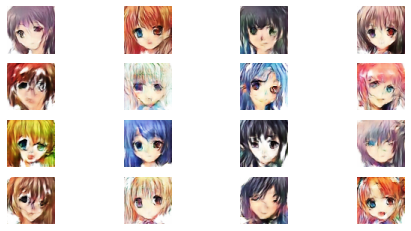

 85%|████████▌ | 34/40 [15:46<02:56, 29.43s/it]

Time for epoch 34 is 24.886474609375 sec
Training started with epoch 35 with 497 batches...
Losses after epoch    35: generator 1.348, discriminator 0.703, real_score 96.26%, fake_score 38.64%


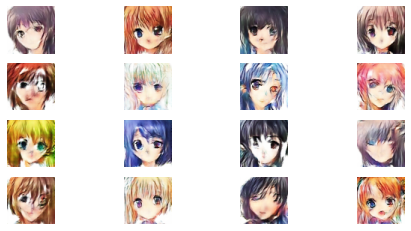

 88%|████████▊ | 35/40 [16:11<02:20, 28.01s/it]

Time for epoch 35 is 24.71050500869751 sec
Training started with epoch 36 with 497 batches...
Losses after epoch    36: generator 2.885, discriminator 0.222, real_score 94.66%, fake_score 12.91%


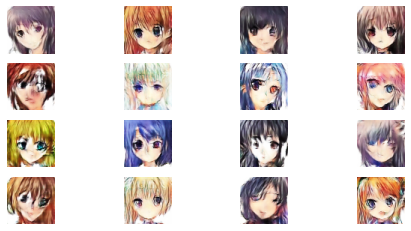

 90%|█████████ | 36/40 [16:52<02:08, 32.03s/it]

Time for epoch 36 is 41.40014100074768 sec
Training started with epoch 37 with 497 batches...
Losses after epoch    37: generator 2.092, discriminator 0.391, real_score 91.82%, fake_score 21.47%


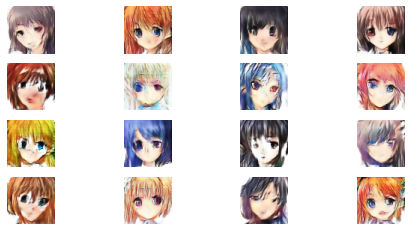

 92%|█████████▎| 37/40 [17:17<01:29, 29.79s/it]

Time for epoch 37 is 24.544107675552368 sec
Training started with epoch 38 with 497 batches...
Losses after epoch    38: generator 2.923, discriminator 0.972, real_score 58.32%, fake_score 13.70%


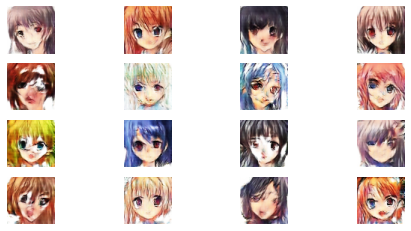

 95%|█████████▌| 38/40 [17:42<00:56, 28.34s/it]

Time for epoch 38 is 24.949415922164917 sec
Training started with epoch 39 with 497 batches...
Losses after epoch    39: generator 2.947, discriminator 0.280, real_score 91.75%, fake_score 13.77%


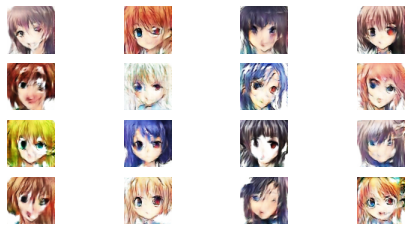

 98%|█████████▊| 39/40 [18:23<00:32, 32.26s/it]

Time for epoch 39 is 41.41237211227417 sec
Training started with epoch 40 with 497 batches...
Losses after epoch    40: generator 2.305, discriminator 0.480, real_score 86.62%, fake_score 21.27%


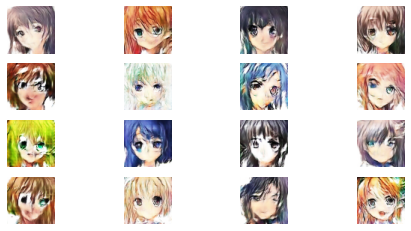

100%|██████████| 40/40 [18:48<00:00, 28.21s/it]

Time for epoch 40 is 24.636027097702026 sec


In [ ]:
gen_loss_epochs, disc_loss_epochs, real_score_list, fake_score_list = train(train_dataset, epochs=epochs)

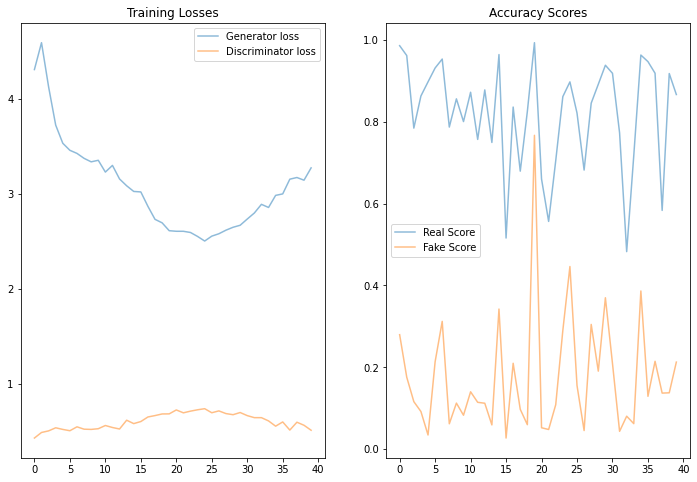

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))

ax1.plot(gen_loss_epochs, label = 'Generator loss', alpha=0.5)
ax1.plot(disc_loss_epochs, label = 'Discriminator loss', alpha=0.5)
ax1.legend()

ax1.set_title('Training Losses')
ax2.plot(real_score_list, label = 'Real Score', alpha = 0.5)
ax2.plot(fake_score_list, label = 'Fake Score', alpha = 0.5)
ax2.set_title('Accuracy Scores')

ax2.legend()